## 🌍 Análisis de Anomalías de Temperatura Global (NASA GISTEMP, 1880–2025) 
📘 **Contexto del dataset**

El presente análisis utiliza datos del conjunto Global Land-Ocean Temperature Index publicado por la NASA Goddard Institute for Space Studies (GISS).
El dataset recopila las anomalías de temperatura global promedio mensual y anual desde el año 1880 hasta 2025, combinando observaciones terrestres y oceánicas.

Cada valor representa la diferencia entre la temperatura registrada y el promedio base del período 1951–1980, medido en grados Celsius (°C).
____________________________
🔗 **Fuente de los datos:**

Global Land-Ocean Temperature Index (GISTEMP v4)

NASA Goddard Institute for Space Studies (GISS)

https://data.giss.nasa.gov/gistemp/

____________________
🧭 **¿Qué significa una anomalía de temperatura?**

Una anomalía indica cuánto más cálido o frío fue un año, mes o estación respecto a un clima de referencia.
Por ejemplo:

Anomalía = 𝑇(año) − 𝑇 promedio base (1951–1980)

- Valores positivos → el año fue más cálido que el promedio base.

- Valores negativos → el año fue más frío que el promedio base.

------------------------------
🧩 **¿Por qué se usa el período base 1951–1980?**

Este rango de 30 años fue definido por la NASA porque:

- Representa un período climáticamente estable, sin anomalías extremas prolongadas.

- Cumple con el estándar de la Organización Meteorológica Mundial (OMM) de usar promedios de 30 años para definir el “clima normal”.

- Posee una cobertura global confiable de estaciones meteorológicas terrestres y marítimas.

**De este modo, todas las anomalías reflejan cambios relativos, no valores absolutos, lo que permite  comparar de forma coherente las tendencias térmicas a lo largo del tiempo.**


____________________________
🎯 **Objetivo del análisis**

El propósito de este estudio es explorar y visualizar la evolución de las anomalías de temperatura global para identificar tendencias, patrones estacionales y correlaciones a lo largo del tiempo.
Además, aplicar técnicas básicas de Machine Learning (regresión lineal) para estimar la tendencia futura del calentamiento global.

________________________________________________________________________

In [1]:
#Librerías Necesarias
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Configuración de gráficos
%matplotlib inline
sns.set(style="whitegrid")

In [3]:
# Asegúrate de que el CSV esté en el mismo directorio que tu notebook
df = pd.read_csv("GLB.Ts+dSST.csv")


In [4]:
# Visualizamos las primeras filas
df.head()

,,,,,,,,,,,,,,,,,,Land-Ocean: Global Means
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
1880,-.19,-.25,-.09,-.16,-.10,-.21,-.18,-.10,-.15,-.24,-.22,-.18,-.17,***,***,-.12,-.16,-.20
1881,-.20,-.14,.03,.05,.06,-.19,.00,-.03,-.15,-.22,-.19,-.07,-.09,-.10,-.17,.05,-.07,-.18
1882,.16,.14,.04,-.17,-.14,-.23,-.16,-.07,-.14,-.24,-.17,-.36,-.11,-.09,.08,-.09,-.15,-.18
1883,-.29,-.36,-.12,-.18,-.17,-.07,-.06,-.13,-.21,-.11,-.23,-.11,-.17,-.19,-.34,-.15,-.09,-.18


**Descripción de variables principales** 

- Year: año del registro.

- Jan–Dec: anomalías mensuales de temperatura global (°C) respecto al promedio 1951–1980.

- J-D: promedio anual de las anomalías (January–December).


- La columna **J-D** representa el promedio anual de las anomalías de temperatura global considerando los 12 meses del año. Cada valor indica cuánto se desvió la temperatura promedio de ese año respecto al período base 1951–1980. Valores positivos representan años más cálidos, y negativos, más fríos. Esta variable es clave para analizar la tendencia del calentamiento global, por lo que **será utilizada como la principal referencia en el análisis y en la proyección del modelo.**

In [5]:
df.tail()

,,,,,,,,,,,,,,,,,,Land-Ocean: Global Means
2021,.81,.64,.89,.76,.79,.84,.92,.81,.92,.98,.92,.87,.85,.84,.75,.81,.86,.94
2022,.91,.89,1.04,.83,.84,.92,.94,.95,.89,.96,.73,.80,.89,.90,.89,.91,.94,.86
2023,.87,.97,1.23,.99,.94,1.08,1.19,1.19,1.48,1.34,1.41,1.37,1.17,1.12,.88,1.05,1.15,1.41
2024,1.25,1.44,1.39,1.31,1.14,1.20,1.20,1.30,1.23,1.34,1.29,1.27,1.28,1.29,1.35,1.28,1.23,1.28
2025,1.37,1.25,1.36,1.23,1.07,1.05,1.01,1.14,***,***,***,***,***,***,1.30,1.22,1.07,***


In [6]:
df.columns

Index(['Land-Ocean: Global Means'], dtype='object')

In [7]:
# Tamaño y estructura
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

df.info()

Filas: 147, Columnas: 1
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 147 entries, ('Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA') to ('2025', '1.37', '1.25', '1.36', '1.23', '1.07', '1.05', '1.01', '1.14', '***', '***', '***', '***', '***', '***', '1.30', '1.22', '1.07')
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Land-Ocean: Global Means  147 non-null    object
dtypes: object(1)
memory usage: 58.4+ KB


In [8]:
# Corregir la carga del dataset
# Cargar correctamente el dataset de NASA
df = pd.read_csv("GLB.Ts+dSST.csv", skiprows=1)

In [9]:
# Revisar estructura
print(df.head())
print(df.columns)

   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.19 -0.25 -0.09 -0.16 -0.10 -0.21 -0.18 -0.10  -.15  -.24  -.22   
1  1881 -0.20 -0.14  0.03  0.05  0.06 -0.19  0.00 -0.03  -.15  -.22  -.19   
2  1882  0.16  0.14  0.04 -0.17 -0.14 -0.23 -0.16 -0.07  -.14  -.24  -.17   
3  1883 -0.29 -0.36 -0.12 -0.18 -0.17 -0.07 -0.06 -0.13  -.21  -.11  -.23   
4  1884 -0.13 -0.07 -0.35 -0.40 -0.33 -0.35 -0.30 -0.27  -.27  -.25  -.33   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
0  -.18  -.17   ***   *** -0.12 -0.16  -.20  
1  -.07  -.09  -.10  -.17  0.05 -0.07  -.18  
2  -.36  -.11  -.09   .08 -0.09 -0.15  -.18  
3  -.11  -.17  -.19  -.34 -0.15 -0.09  -.18  
4  -.31  -.28  -.26  -.10 -0.36 -0.31  -.28  
Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'],
      dtype='object')


## Tratamiento de Datos

In [10]:
# datos nulos 
df.isnull().sum()

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
J-D     0
D-N     0
DJF     0
MAM     0
JJA     0
SON     0
dtype: int64

In [11]:
# comprobar si hay valores tipo texto
(df == '***').sum()


Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     1
Oct     1
Nov     1
Dec     1
J-D     1
D-N     2
DJF     1
MAM     0
JJA     0
SON     1
dtype: int64

In [12]:
# Reemplazamos por NA
df.replace('***', pd.NA, inplace=True)
df = df.dropna()

In [13]:
# comprobamos que la data este limpia 

df.isnull().sum()

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
J-D     0
D-N     0
DJF     0
MAM     0
JJA     0
SON     0
dtype: int64

## Análisis Exploratorio de Datos (EDA)

In [14]:
#Revisar nueva estructura

print(df.head())

   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
1  1881 -0.20 -0.14  0.03  0.05  0.06 -0.19  0.00 -0.03  -.15  -.22  -.19   
2  1882  0.16  0.14  0.04 -0.17 -0.14 -0.23 -0.16 -0.07  -.14  -.24  -.17   
3  1883 -0.29 -0.36 -0.12 -0.18 -0.17 -0.07 -0.06 -0.13  -.21  -.11  -.23   
4  1884 -0.13 -0.07 -0.35 -0.40 -0.33 -0.35 -0.30 -0.27  -.27  -.25  -.33   
5  1885 -0.58 -0.34 -0.27 -0.42 -0.45 -0.43 -0.33 -0.31  -.28  -.23  -.24   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
1  -.07  -.09  -.10  -.17  0.05 -0.07  -.18  
2  -.36  -.11  -.09   .08 -0.09 -0.15  -.18  
3  -.11  -.17  -.19  -.34 -0.15 -0.09  -.18  
4  -.31  -.28  -.26  -.10 -0.36 -0.31  -.28  
5  -.10  -.33  -.35  -.41 -0.38 -0.36  -.25  


In [15]:
# Información y descripción DataFrame
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    144 non-null    int64  
 1   Jan     144 non-null    float64
 2   Feb     144 non-null    float64
 3   Mar     144 non-null    float64
 4   Apr     144 non-null    float64
 5   May     144 non-null    float64
 6   Jun     144 non-null    float64
 7   Jul     144 non-null    float64
 8   Aug     144 non-null    float64
 9   Sep     144 non-null    object 
 10  Oct     144 non-null    object 
 11  Nov     144 non-null    object 
 12  Dec     144 non-null    object 
 13  J-D     144 non-null    object 
 14  D-N     144 non-null    object 
 15  DJF     144 non-null    object 
 16  MAM     144 non-null    float64
 17  JJA     144 non-null    float64
 18  SON     144 non-null    object 
dtypes: float64(10), int64(1), object(8)
memory usage: 22.5+ KB


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,MAM,JJA
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,1952.500000,0.069792,0.079097,0.095139,0.069028,0.057917,0.046944,0.071389,0.070139,0.074444,0.062778
std,41.713307,0.435399,0.442711,0.448413,0.411234,0.389108,0.389120,0.372137,0.388272,0.411618,0.379575
min,1881.000000,-0.810000,-0.640000,-0.640000,-0.600000,-0.560000,-0.530000,-0.520000,-0.550000,-0.590000,-0.500000
25%,1916.750000,-0.252500,-0.240000,-0.232500,-0.260000,-0.242500,-0.250000,-0.192500,-0.220000,-0.260000,-0.230000
50%,1952.500000,-0.010000,-0.035000,0.015000,-0.015000,-0.040000,-0.050000,-0.030000,-0.040000,-0.015000,-0.040000
75%,1988.250000,0.320000,0.392500,0.327500,0.292500,0.280000,0.262500,0.270000,0.272500,0.310000,0.290000
max,2024.000000,1.250000,1.440000,1.390000,1.310000,1.140000,1.200000,1.200000,1.300000,1.280000,1.230000


Los resultados del análisis estadístico muestran que las anomalías de temperatura presentan una ligera tendencia positiva en todos los meses analizados, evidenciando el calentamiento global a lo largo del tiempo.

- Enero (Jan): promedio de +0.07 °C, con una variabilidad moderada (desviación ≈ 0.44 °C). Los valores extremos van desde –0.81 °C hasta +1.25 °C, mostrando inviernos más fríos en los primeros años del registro y más cálidos en décadas recientes.

- Abril (Apr): promedio similar (+0.07 °C) y desviación ≈ 0.41 °C, pero con una amplitud de casi 2 °C entre los extremos. Presenta una tendencia más estable, aunque con picos de calentamiento marcados en los últimos 20 años.

- Junio (Jun): promedio ligeramente menor (+0.05 °C) y menor variabilidad (desviación ≈ 0.39 °C), lo que refleja un comportamiento más uniforme durante el verano del hemisferio norte.

👉 En conjunto, los datos confirman una tendencia general de aumento en las anomalías térmicas globales, con mayor variabilidad en los meses invernales.

## Visualizaciones

🔹 1️⃣ **Evolución del promedio anual (Tendencia global)**

👉 Objetivo: visualizar cómo ha cambiado la anomalía media anual de temperatura a lo largo del tiempo (1880–2025). 

In [16]:
# Asegurar que la columna 'J-D' sea numérica
df['J-D'] = pd.to_numeric(df['J-D'], errors='coerce')

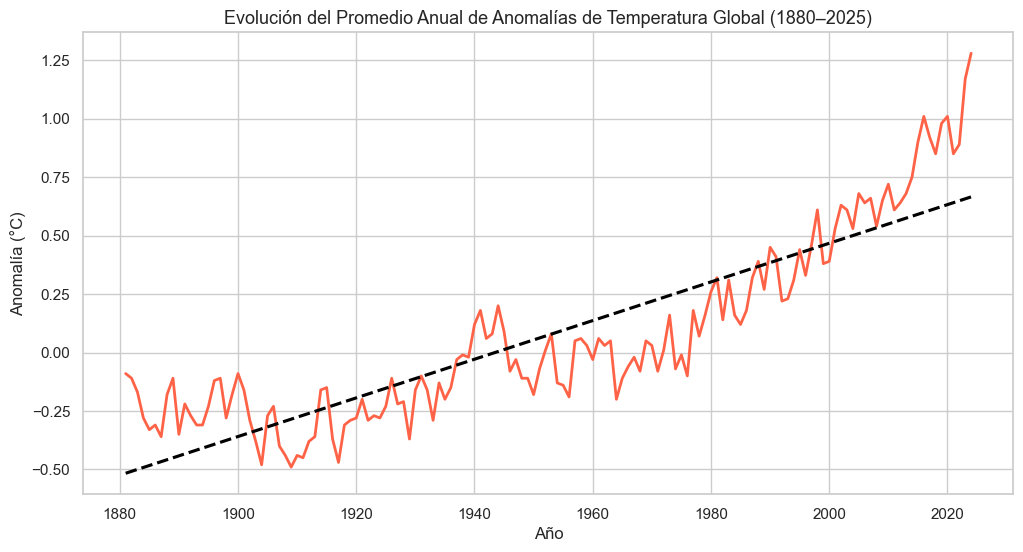

In [17]:
# Crear una figura
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='J-D', data=df, color='tomato', linewidth=2)
sns.regplot(x='Year', y='J-D', data=df, scatter=False, color='black', ci=None, line_kws={'linestyle':'--'})

plt.title('Evolución del Promedio Anual de Anomalías de Temperatura Global (1880–2025)', fontsize=13)
plt.xlabel('Año')
plt.ylabel('Anomalía (°C)')
plt.grid(True)
plt.show()

    El gráfico muestra la evolución de las anomalías anuales de temperatura global desde 1880 hasta 2025 (línea roja), junto a una línea de tendencia lineal (negra segmentada) que evidencia el incremento sostenido de la temperatura media global a lo largo del tiempo.

- 1880–1900: la línea roja se mantiene mayormente por encima de la tendencia (negra), con valores de anomalía que oscilan entre 0 y –0.3 °C, reflejando un período inicial con temperaturas relativamente estables y cercanas al promedio de referencia.

- 1900–1940: se observa una tendencia a la baja, con anomalías predominantemente negativas, llegando en varios años a valores cercanos a –0.5 °C. Este período coincide con una fase fría global antes del repunte de mediados de siglo.

- 1940–1980: las anomalías muestran una mayor variabilidad interanual. Durante los años 40, algunas anomalías se sitúan por encima de 0 °C (alrededor de +0.25 °C), marcando un leve calentamiento. Entre 1950 y 1975, se aprecia una fase de estabilización o ligero enfriamiento, con valores cercanos o inferiores a 0 °C. A fines de los 70, la serie vuelve a mostrar un incremento sostenido, anticipando la tendencia al alza de las décadas siguientes.

- 1980–2025: **se evidencia una aceleración clara del calentamiento global**.
Las anomalías superan +0.25 °C y continúan en ascenso, alcanzando valores cercanos a +1.25 °C en los años más recientes. Aunque existen oscilaciones interanuales, la tendencia general es inequívocamente ascendente, confirmando un calentamiento persistente del sistema climático terrestre.

🧠 Conclusión:
La evolución del promedio anual de las anomalías de temperatura global muestra una tendencia de calentamiento continuo desde mediados del siglo XX, con un incremento particularmente pronunciado desde los años 80 hasta la actualidad.

________________

🔹 2️ **Promedio de anomalías de temperatura global por década (1880 - 2025)**

👉 Objetivo: suavizar las fluctuaciones anuales y resaltar la tendencia por períodos de 10 años.

C:\Users\lench\AppData\Local\Temp\ipykernel_9240\1768574460.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Decade', y='J-D', data=decade_avg, palette='coolwarm')


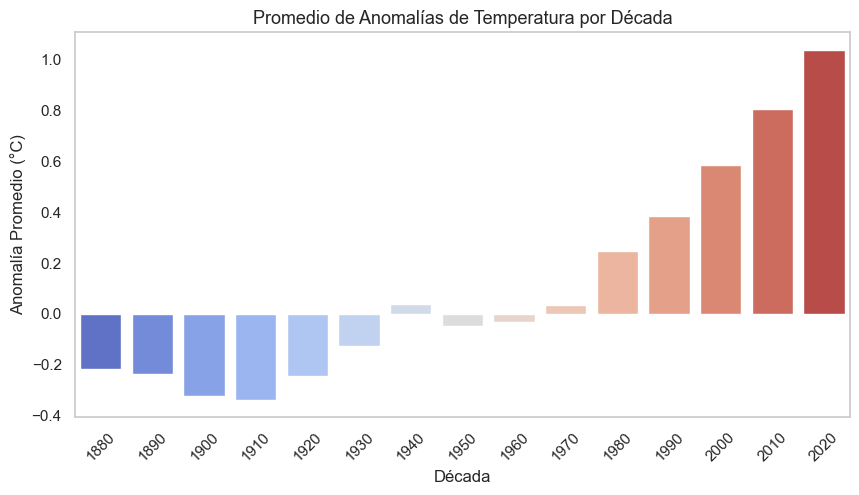

In [18]:
# Crear una columna de década
df['Decade'] = (df['Year'] // 10) * 10

# Calcular promedio por década
decade_avg = df.groupby('Decade')['J-D'].mean().reset_index()

# Gráfico
plt.figure(figsize=(10,5))
sns.barplot(x='Decade', y='J-D', data=decade_avg, palette='coolwarm')
plt.title('Promedio de Anomalías de Temperatura por Década', fontsize=13)
plt.xlabel('Década')
plt.ylabel('Anomalía Promedio (°C)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


    El gráfico de barras muestra el promedio decenal de las anomalías de temperatura global desde 1880 hasta 2025, permitiendo observar con mayor claridad las tendencias de largo plazo en el calentamiento global.

- 1880–1930: las barras se mantienen por debajo de 0 °C, lo que indica que durante estas cinco décadas las temperaturas globales fueron más frías que el promedio del período base (1951–1980).

- 1930–1970: se observa una tendencia de aumento gradual, con promedios que comienzan a acercarse a 0 °C, señalando una etapa de transición hacia un clima más cálido, aunque aún sin superar el promedio histórico.

- 1970–2015: la temperatura media por década supera claramente los 0 °C y muestra un patrón ascendente casi exponencial, reflejando el inicio del calentamiento global moderno, intensificado desde los años 80.

🧠 Conclusión:
Esta visualización ratifica el comportamiento observado en el gráfico de evolución anual, evidenciando que el calentamiento global no es un fenómeno puntual, sino una tendencia sostenida y acumulativa a lo largo de las décadas, especialmente marcada en los últimos 50 años.

____________________

🔹 3️⃣ **Distribución general de las anomalías**


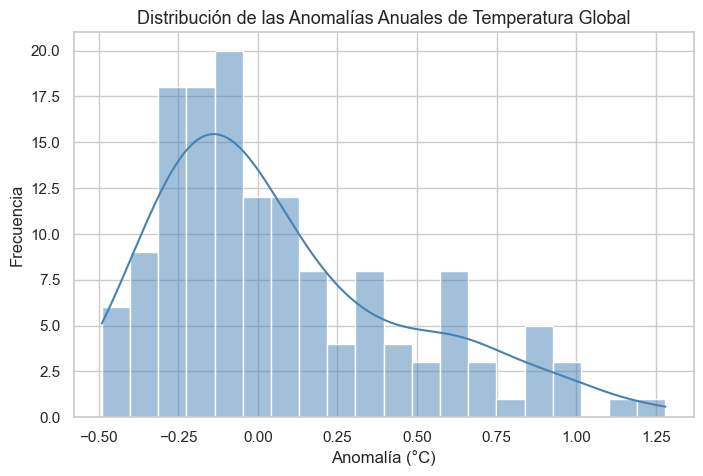

In [19]:
# observar cómo se distribuyen las anomalías anuales — si están centradas, sesgadas o presentan valores extremos
plt.figure(figsize=(8,5))
sns.histplot(df['J-D'], kde=True, color='steelblue', bins=20)
plt.title('Distribución de las Anomalías Anuales de Temperatura Global', fontsize=13)
plt.xlabel('Anomalía (°C)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


🌍 Distribución de las anomalías de temperatura global (1880–2025)

    El gráfico de distribución muestra cómo se concentran las anomalías de temperatura global a lo largo de todo el período analizado, evidenciando la frecuencia con que se han registrado distintos niveles de desviación respecto al promedio 1951–1980.

- Anomalías frías (-0.5 °C a 0 °C):
En esta zona se concentran la mayor cantidad de observaciones, especialmente entre –0.25 °C y 0 °C, donde la frecuencia alcanza su pico máximo (alrededor de 20 observaciones). Esto refleja que durante gran parte del siglo XX, las temperaturas globales se mantuvieron ligeramente por debajo del promedio histórico.

- Anomalías extremas negativas (< –0.5 °C):
Estas son menos frecuentes (entre 5 y 10 observaciones) y corresponden principalmente a los años más fríos del siglo XIX y principios del XX, influenciados posiblemente por factores naturales (actividad volcánica o menor irradiancia solar).

- Anomalías positivas (> 0 °C):
A partir de +0.25 °C, se observa un descenso gradual en la frecuencia, aunque con algunos picos aislados cercanos a +0.75 °C, lo que representa los años más cálidos del registro reciente.

🧠 Conclusión:
La distribución muestra una asimetría hacia la derecha (sesgo positivo), lo que indica que las anomalías cálidas se han vuelto más frecuentes en las últimas décadas. Este desplazamiento de la curva confirma una tendencia general de calentamiento global sostenida desde mediados del siglo XX.

________________

🌤️ **Descripción de variables estacionales (DJF, MAM, JJA, SON)**

Estas columnas representan el promedio estacional de las anomalías de temperatura global según el calendario del hemisferio norte, agrupando los meses del año de tres en tres. Su función es mostrar cómo varía el calentamiento global a lo largo de las estaciones, suavizando la variabilidad mensual.

- **DJF** (Diciembre–Enero–Febrero):
Corresponde al **invierno boreal**. Mide la anomalía media de los meses más fríos del año. Tiende a mostrar valores más extremos, por la fuerte influencia de fenómenos climáticos como El Niño o La Niña.

- **MAM** (Marzo–Abril–Mayo):
Representa la **primavera boreal**, una etapa de transición térmica. Suele mostrar una tendencia más estable y marca el inicio del ascenso de las temperaturas globales.

- **JJA** (Junio–Julio–Agosto):
Es el **verano boreal**, y sus valores suelen ser más suaves y menos variables, ya que las temperaturas globales alcanzan un equilibrio estacional.

- **SON**(Septiembre–Octubre–Noviembre):
Corresponde al **otoño boreal**, cuando las temperaturas comienzan a descender. Permite observar la persistencia del calor hacia el final del año, siendo útil para detectar años excepcionalmente cálidos.

_____________________

🔹 4️⃣ **Gráfica de Estacionalidad – Por estaciones del año (1880 - 2025)**


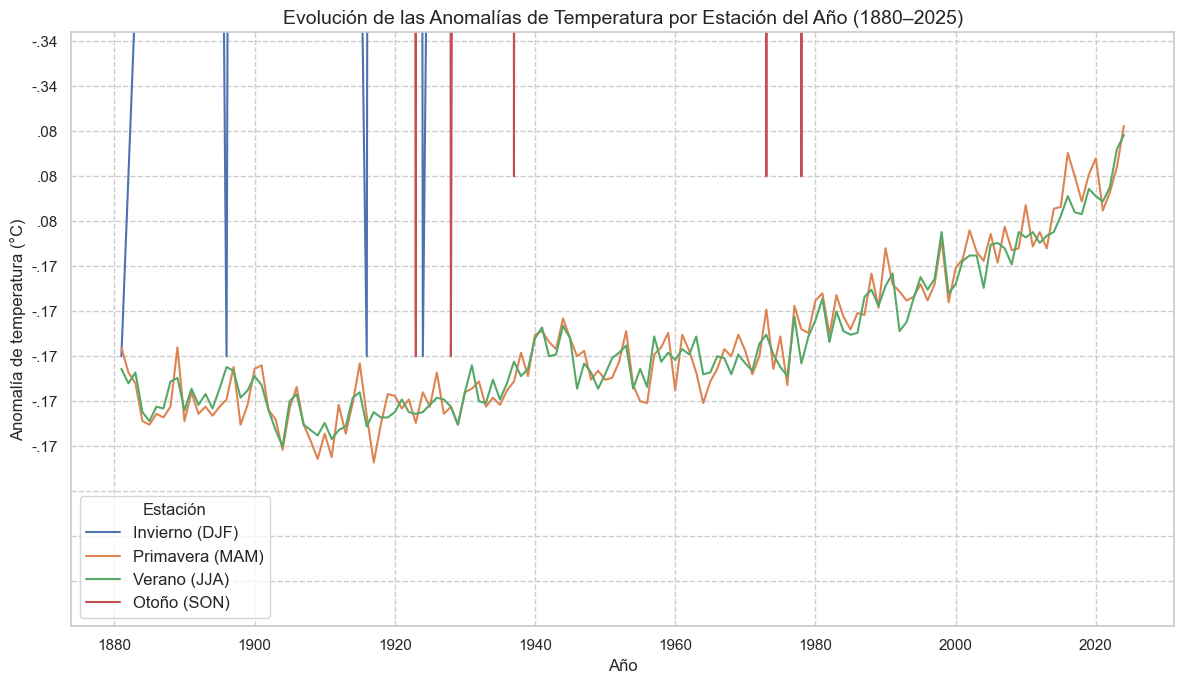

In [20]:
import numpy as np

plt.figure(figsize=(12,7))
sns.lineplot(data=df, x='Year', y='DJF', label='Invierno (DJF)')
sns.lineplot(data=df, x='Year', y='MAM', label='Primavera (MAM)')
sns.lineplot(data=df, x='Year', y='JJA', label='Verano (JJA)')
sns.lineplot(data=df, x='Year', y='SON', label='Otoño (SON)')

plt.title('Evolución de las Anomalías de Temperatura por Estación del Año (1880–2025)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Anomalía de temperatura (°C)', fontsize=12)
plt.legend(title="Estación", fontsize=12)
plt.grid(True, linestyle='--', alpha=1.0)

# 🔧 Ajustes de legibilidad del eje Y
plt.ylim(-1.5, 1.8)                    # Aumenta el rango vertical visible
plt.yticks(np.arange(-1.5, 1.9, 0.25)) # Espaciado entre valores
plt.tight_layout()

plt.show()


**Interpretación:** Este gráfico muestra cómo han cambiado las anomalías de temperatura global promedio en cada estación del año (invierno, primavera, verano y otoño del hemisferio norte) desde 1880 hasta 2025.

🔹 **1880–1940:** Durante las primeras seis décadas del registro, las anomalías se mantienen por debajo de 0 °C, con valores negativos recurrentes en todas las estaciones.
El invierno (DJF) y la primavera (MAM) presentan las variaciones más marcadas, reflejando inviernos fríos y una recuperación térmica lenta hacia mediados de siglo.

🔹 **1940–1980:** En este periodo, se observa una mayor oscilación interanual, pero sin un cambio sostenido.
Las curvas de las estaciones tienden a agruparse cerca de 0 °C, lo que indica un periodo de relativa estabilidad térmica global, previo al aumento sostenido de la temperatura.

🔹 **1980–2025:** Desde la década de 1980, se aprecia con claridad una tendencia ascendente pronunciada en todas las estaciones, superando consistentemente el umbral de 0 °C.
El invierno (DJF) muestra el **mayor aumento** y la **mayor variabilidad**, lo que coincide con estudios que señalan que los inviernos boreales se están calentando más rápido que las demás estaciones.
El verano (JJA), aunque también aumenta, presenta un patrón más estable y sostenido.

🧠 **Conclusión:**
El gráfico evidencia un cambio estructural en el comportamiento térmico global.
Desde 1980, todas las estaciones del año exhiben anomalías positivas persistentes, lo que confirma el calentamiento global sostenido.
La mayor pendiente en DJF sugiere que los inviernos son los que más se han calentado, alterando la dinámica estacional del planeta.


_______________________________

🔹 5. **Correlación entre anomalías de temperatura por estación**

Matriz de correlación entre estaciones:
          DJF       MAM       JJA       SON
DJF  1.000000  0.961973  0.941030  0.912888
MAM  0.961973  1.000000  0.972470  0.946400
JJA  0.941030  0.972470  1.000000  0.972729
SON  0.912888  0.946400  0.972729  1.000000


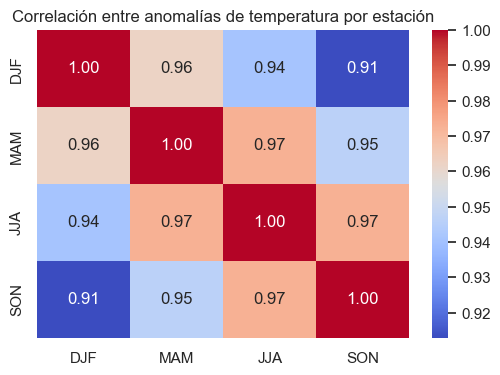

In [21]:
# Correlación entre las anomalías estacionales
correlacion_estaciones = df[['DJF', 'MAM', 'JJA', 'SON']].corr()

print("Matriz de correlación entre estaciones:")
print(correlacion_estaciones)


# Visualización opcional con mapa de calor
plt.figure(figsize=(6,4))
sns.heatmap(correlacion_estaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre anomalías de temperatura por estación")
plt.show()

🧠 **Interpretación (Correlación entre anomalías por estación):**

- Todas las estaciones presentan correlaciones muy altas (entre 0.91 y 0.97), lo que indica que las anomalías de temperatura global tienden a variar en conjunto: cuando una estación se calienta, las demás también lo hacen.

- La correlación más alta (0.97) se da entre verano (JJA) y otoño (SON), lo que sugiere que los patrones térmicos de mediados y fines de año se comportan de manera muy similar.

- La correlación más baja (0.91) aparece entre invierno (DJF) y otoño (SON), lo cual refleja que el invierno presenta una variabilidad ligeramente más independiente, probablemente influida por fenómenos como El Niño / La Niña o variaciones árticas.

En general, la fuerte coherencia entre estaciones refuerza la idea de un calentamiento global uniforme, donde las variaciones de temperatura no son locales ni estacionales, sino parte de una tendencia global sostenida.

    Conclusión: Las anomalías de temperatura muestran correlaciones muy altas entre todas las estaciones, lo que indica que el calentamiento global se manifiesta de forma consistente a lo largo del año. Cuando la temperatura aumenta en una estación, las demás también tienden a hacerlo. Aunque el invierno presenta una variabilidad ligeramente mayor, la fuerte coherencia general confirma que el cambio térmico no es estacional ni localizado, sino parte de una tendencia global sostenida de calentamiento.

_____________________

🔹 6. 🧩 **Gráfico: Estacionalidad de las anomalías de temperatura global (1880–2025)**

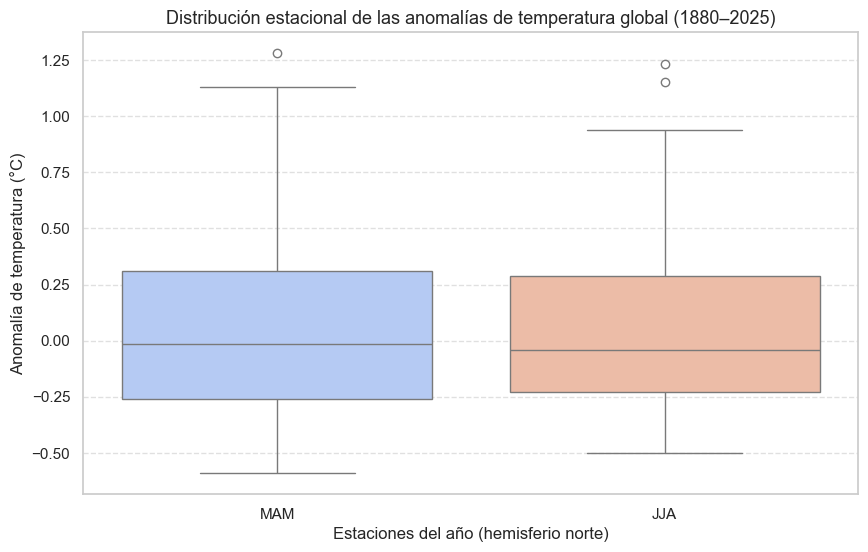

In [22]:
# Seleccionar las columnas relevantes
seasonal_cols = ["DJF", "MAM", "JJA", "SON"]
# Diagrama de cajas (boxplot)
plt.figure(figsize=(10,6))
sns.boxplot(data=df[seasonal_cols], palette="coolwarm")

plt.title("Distribución estacional de las anomalías de temperatura global (1880–2025)", fontsize=13)
plt.xlabel("Estaciones del año (hemisferio norte)")
plt.ylabel("Anomalía de temperatura (°C)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

🧠 **Interpretación general del gráfico “Distribución estacional de las anomalías de temperatura global (1880–2025)”**

- MAM (Primavera):
La distribución de anomalías muestra que la mayoría de los valores se concentran entre –0.25 °C y +0.28 °C, con una mediana ligeramente negativa (ligeramente más fría que el promedio).
Los valores extremos (bigotes) alcanzan desde –0.5 °C hasta cerca de +1.2 °C, y se observa un outlier por encima de +1.25 °C, correspondiente a años de calentamiento excepcional (como 2016 o 2020).

- JJA (Verano):
La caja presenta un rango similar (–0.24 °C a +0.26 °C), con una mediana ligeramente bajo 0 °C, lo que indica un comportamiento estable y cercano al promedio histórico.
El bigote inferior llega hasta –0.5 °C, mientras que el superior se extiende bajo +1.0 °C. También hay dos outliers por encima de +1.25 °C, lo que sugiere picos de calor anómalos en algunos veranos recientes.

**Conclusión**:

Tanto en primavera (MAM) como en verano (JJA), la mayoría de las anomalías de temperatura se concentran cerca de 0 °C respecto al promedio histórico, lo que indica una variación estacional relativamente estable durante gran parte del periodo analizado. Sin embargo, la presencia de valores extremos y outliers positivos recientes —especialmente por encima de **+1.0 °C**— evidencia un incremento notable del **calentamiento global en décadas recientes**, con años que se destacan claramente como los más cálidos registrados.

______________________

🔹 7. 📈 **Gráfico de dispersión: Anomalías por estación del año (1880–2025)**

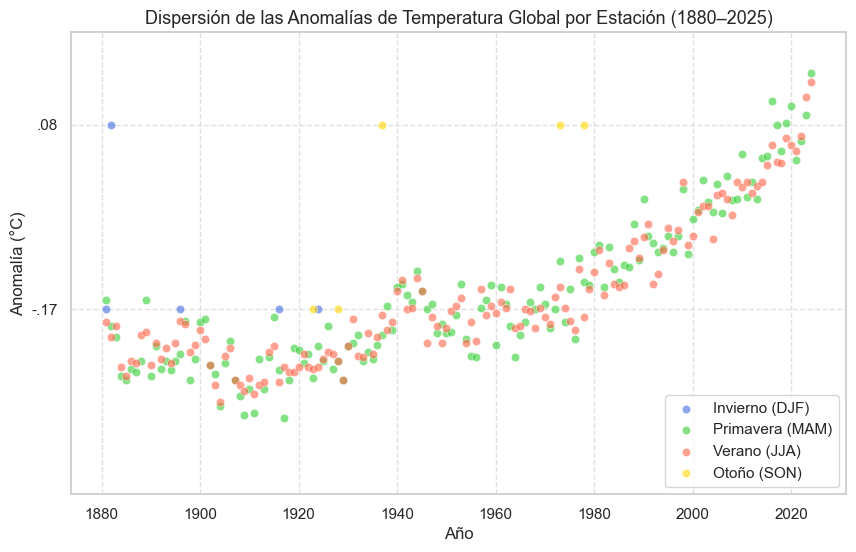

In [23]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x='Year', y='DJF', color='royalblue', alpha=0.6, label='Invierno (DJF)')
sns.scatterplot(data=df, x='Year', y='MAM', color='limegreen', alpha=0.6, label='Primavera (MAM)')
sns.scatterplot(data=df, x='Year', y='JJA', color='tomato', alpha=0.6, label='Verano (JJA)')
sns.scatterplot(data=df, x='Year', y='SON', color='gold', alpha=0.6, label='Otoño (SON)')

plt.title('Dispersión de las Anomalías de Temperatura Global por Estación (1880–2025)', fontsize=13)
plt.xlabel('Año')
plt.ylabel('Anomalía (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(-1, 1.5)
plt.show()


🧭 **Interpretación**

- Invierno (DJF): En los primeros años (1880–1920), se observan pocas mediciones y una tendencia predominante hacia anomalías negativas, reflejando inviernos más fríos que el promedio base. Se destaca un valor atípico (outlier) al inicio del periodo. A partir de mediados del siglo XX, los valores comienzan a acercarse al promedio y luego superarlo.

- Primavera (MAM): Entre 1880 y 1940, las anomalías se mantienen mayormente negativas. En el intervalo 1940–1980, se observa una mezcla de valores negativos y positivos, indicando cierta estabilidad climática. Desde 1980 en adelante, la tendencia es claramente positiva y creciente, con un aumento sostenido de las temperaturas globales.

- Verano (JJA): Muestra un comportamiento muy similar al de la primavera (MAM). Los primeros años reflejan anomalías negativas persistentes (1880–1940), seguidos de un periodo de relativa estabilidad (1940–1980). A partir de 1980, se evidencia un incremento pronunciado de las anomalías, con valores consistentemente por encima de 0 °C.

- Otoño (SON): Entre 1920 y 1930 se registran principalmente anomalías negativas. Sin embargo, se destacan tres años específicos con anomalías positivas, señalando episodios de temperaturas otoñales superiores al promedio histórico.

💡 Conclusión:

El gráfico de dispersión evidencia una transición clara de un periodo de anomalías frías a cálidas.
Desde la década de 1980, todas las estaciones presentan un patrón ascendente sostenido, lo que confirma el calentamiento global generalizado a lo largo de las estaciones del año.

___________________

**Conclusión General de la Etapa de Visualización (EDA)**

El análisis exploratorio de los datos evidencia de forma consistente una tendencia sostenida de calentamiento global desde mediados del siglo XX, con un **aumento** especialmente marcado a partir de la **década de 1980**. Tanto la evolución anual como el promedio por décadas muestran que las **anomalías de temperatura** han pasado de valores predominantemente negativos a positivos, reflejando un incremento acumulativo y continuo de la temperatura global.

La distribución de las anomalías confirma este patrón, mostrando un sesgo hacia valores más cálidos en los últimos años. Al desagregar por estaciones, se observa que todas las estaciones del año presentan anomalías térmicas positivas persistentes en las últimas décadas, siendo el invierno (DJF) la estación con mayor incremento, lo que indica un cambio estructural en la dinámica térmica global.

**Las correlaciones** muy **altas** entre las anomalías estacionales refuerzan la conclusión de que el calentamiento no es un fenómeno local ni temporal, sino global y uniforme a lo largo del año. Asimismo, los análisis de distribución estacional y dispersión muestran la aparición de años con anomalías excepcionalmente altas, asociadas a eventos recientes de calentamiento extremo.

En conjunto, la etapa de visualización confirma de manera sólida y consistente la existencia de un **calentamiento global sostenido**, progresivo y estructural, que afecta todas las estaciones y se ha intensificado notoriamente durante los últimos 50 años.

------------------------------

## Regresión Lineal (Predicción de tendencia térmica global)

***Objetivo:*** Construir un modelo de regresión lineal simple que relacione el año (Year) con la anomalía de temperatura promedio anual (J-D), para estimar la tendencia del calentamiento global y proyectar posibles valores futuros.

1) ¿Qué queremos predecir?

Queremos estimar cómo cambia la anomalía de temperatura global a lo largo del tiempo.

- Variable independiente (X): Año

- Variable dependiente (Y): Anomalía térmica promedio anual (J-D)

En palabras simples: Queremos ver si la temperatura global ha aumentado con los años, y cuánto.

***Preparación de datos***

In [24]:
#bibliotecas necesarias
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Variables qué utilizaremos
X = df[['Year']]               # Variable independiente
y = df['J-D']                  # Variable dependiente (anomalía promedio anual)

# Separar datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


***Entrenar el modelo***

In [25]:
# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

***Evaluar el Modelo***

In [26]:
# Predicciones
y_pred = modelo.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Coeficiente de determinación (R²): {r2:.3f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.3f}")


Coeficiente de determinación (R²): 0.815
Raíz del error cuadrático medio (RMSE): 0.143


**Interpretación de R² = 0.815**

El valor de R² indica qué proporción de la variabilidad de la anomalía de temperatura puede explicar el modelo usando solamente el año como variable predictora.

- Con R² = 0.815, esto significa que: El 81.5% de la variación en las anomalías de temperatura global se explica por la tendencia temporal (el paso de los años).

Esto es un valor alto, lo cual indica:

  - Un patrón de calentamiento global claro y consistente en el tiempo

  - La relación entre el año y la anomalía es fuerte y positiva
  
  - El calentamiento no es aleatorio, sino tendencial y sostenido

**Interpretación de RMSE = 0.143 °C**

El RMSE mide cuánto se desvía el modelo en promedio respecto a los valores reales.

- Un RMSE de 0.143°C significa que:

En promedio, el modelo se equivoca alrededor de 0.14°C en sus predicciones.

Este error es bajo, considerando que:

- El rango histórico de anomalías va aproximadamente de -0.8°C a +1.3°C

- 0.14°C representa solo una pequeña fracción de esta amplitud.

***Visualizar la tendencia y la predicción***

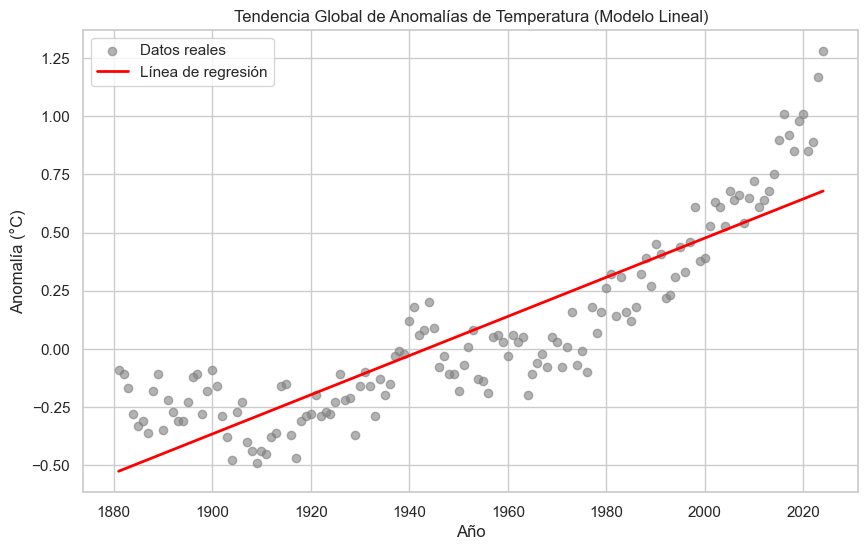

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='gray', alpha=0.6, label='Datos reales')
plt.plot(X, modelo.predict(X), color='red', linewidth=2, label='Línea de regresión')
plt.title('Tendencia Global de Anomalías de Temperatura (Modelo Lineal)')
plt.xlabel('Año')
plt.ylabel('Anomalía (°C)')
plt.legend()
plt.grid(True)
plt.show()

**Interpretación del gráfico: Tendencia Global de Anomalías de Temperatura (Modelo Lineal)**

El gráfico de dispersión muestra la evolución de las anomalías de temperatura global desde **1880 hasta 2025**, junto con la línea de regresión lineal ajustada:

- Período 1880–1940: Se observa un predominio de anomalías negativas, lo que indica que las temperaturas globales eran más frías que el promedio base. Durante estas décadas, los valores fluctúan levemente, pero la tendencia general sigue siendo fría.

- Período 1940–1979: La serie muestra una etapa de estabilidad relativa, donde las anomalías se mantienen cercanas a 0°C. No hay una tendencia clara de aumento sostenido, sino pequeñas oscilaciones alrededor del promedio.

- Período 1980–2025: A partir de inicios de los años 80, se aprecia un aumento sostenido y consistente en las anomalías. Los valores pasan de estar alrededor de 0°C a superar +1.0°C en los últimos años, reflejando el fenómeno conocido como calentamiento global acelerado.

**Línea de regresión (tendencia global):**
La línea roja trazada muestra una tendencia positiva clara y estable a lo largo del tiempo.
Aunque existen variaciones interanuales (causadas por fenómenos como El Niño/La Niña, erupciones volcánicas o ciclos oceánicos), la tendencia lineal indica que:

- La temperatura global ha aumentado de forma sostenida durante los últimos **140 años**.

- El hecho de que el **RMSE** del modelo sea bajo confirma que la regresión se ajusta bien a la tendencia general, incluso si no captura pequeñas variaciones puntuales.

_____________________________________

**Proyección Futura (Hasta 2050)**

¿Qué significa proyectar la tendencia hacia el futuro?

Como ya construimos una regresión lineal que relaciona Año → Anomalía de Temperatura (°C), podemos usar ese modelo para estimar valores futuros, por ejemplo:
- 2030
- 2040
- 2050

**Esto no es una predicción exacta del clima**, sino una proyección estadística basada en la tendencia histórica observada. 
Es decir: si la tendencia actual continúa sin cambios drásticos, ¿cuál sería la anomalía de temperatura en los próximos años?


In [28]:
# Crear rango futuro de años
years_future = np.arange(df['Year'].max() + 1, 2051).reshape(-1, 1)

# Obtener predicciones del modelo para esos años
future_predictions = modelo.predict(years_future)

c:\Users\lench\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
# Crear DataFrame con las proyecciones
proyeccion_df = pd.DataFrame({
    'Year': years_future.flatten(),
    'Predicted_Anomaly (°C)': future_predictions.flatten()
})

# Mostrar tabla en el notebook
proyeccion_df


,Year,Predicted_Anomaly (°C)
0,2025,0.687366
1,2026,0.695794
2,2027,0.704222
3,2028,0.712650
4,2029,0.721078
5,2030,0.729506
6,2031,0.737934
7,2032,0.746363
8,2033,0.754791
9,2034,0.763219


**Visualización de 'Proyección de Anomalías de Temperatura Global (hasta 2050)'**

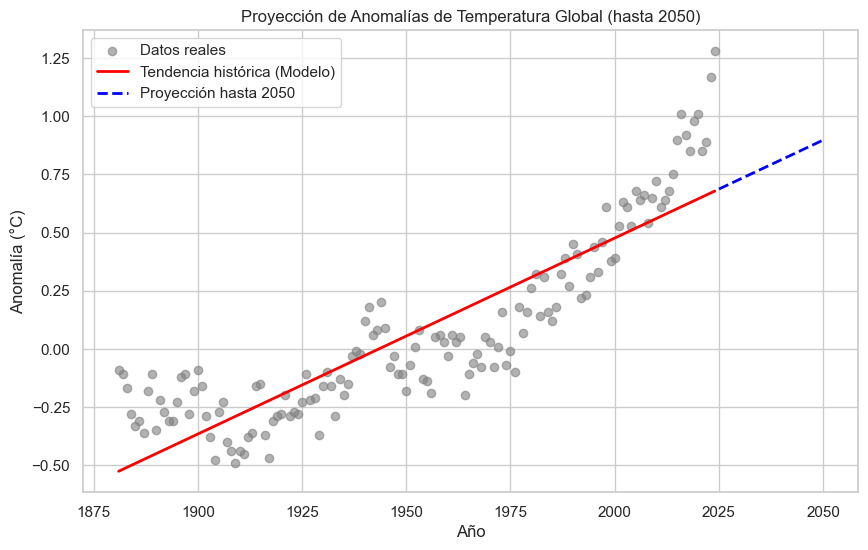

In [30]:
plt.figure(figsize=(10,6))

# Datos reales ((J-D) Promedio anual global Indicador oficial del calentamiento global)
plt.scatter(df['Year'], df['J-D'], color='gray', alpha=0.6, label='Datos reales')

# Línea de modelo (histórica)
plt.plot(df['Year'], modelo.predict(df[['Year']]), color='red', linewidth=2, label='Tendencia histórica (Modelo)')

# Predicción futura
plt.plot(years_future, future_predictions, color='blue', linewidth=2, linestyle='--', label='Proyección hasta 2050')

plt.title('Proyección de Anomalías de Temperatura Global (hasta 2050)')
plt.xlabel('Año')
plt.ylabel('Anomalía (°C)')
plt.legend()
plt.grid(True)
plt.show()


✅ **Interpretación de la proyección (hasta 2050)**

La proyección se construye a partir de un modelo de regresión lineal que representa la tendencia promedio del calentamiento global en el periodo analizado. No obstante, los datos recientes (2000–2025) muestran una aceleración más marcada que la sugerida por el modelo, lo que indica que la tendencia real podría no ser estrictamente lineal. El coeficiente del modelo estima un aumento aproximado de **0.0085 °C** por año, lo que proyecta un incremento cercano a **+0.21 °C** hacia **2050** respecto al valor actual. Sin embargo, si la aceleración observada en las últimas décadas persiste, esta proyección lineal podría subestimar el aumento real de la temperatura, a menos que el ritmo de calentamiento se estabilice en los próximos años.

    Conclusión: la proyección lineal es útil como referencia promedio en la tendencia histórica, pero resulta conveniente comparar con estimaciones basadas en ventanas temporales recientes o modelos con curvatura para capturar posibles aceleraciones.
-----------------------------------------------

**Conclusión de la Etapa de Machine Learning**

El modelo de regresión lineal aplicado demuestra que existe una relación fuerte y consistente entre el paso del tiempo y el incremento de las anomalías de temperatura global. El valor de **R² = 0.815** indica que el modelo es capaz de explicar el **81.5%** de la variación en las anomalías utilizando únicamente el año como predictor, lo que confirma que el calentamiento global no es un fenómeno aleatorio, sino una tendencia sostenida y progresiva.

El **RMSE = 0.143°C** muestra que el error promedio del modelo es bajo en comparación con el rango histórico de variación de las temperaturas, por lo que el ajuste logrado es adecuado para describir la tendencia general, aunque no capture variaciones puntuales de corto plazo causadas por factores climáticos específicos.

La visualización del modelo revela tres grandes etapas en la evolución térmica:

- **1880–1940:** predominio de anomalías negativas (temperaturas más frías).

- **1940–1979:** relativa estabilidad cercana a la media histórica.

- **1980–2025:** incremento sostenido y acelerado, donde las anomalías positivas se intensifican.

Finalmente, la **proyección lineal** hacia **2050** señala un aumento aproximado de **+0.21°C** respecto a los niveles actuales, si la tendencia media se mantiene. No obstante, los datos recientes sugieren que el calentamiento podría estar ocurriendo a un ritmo más rápido que el modelado lineal, lo cual refuerza la importancia de considerar escenarios más complejos en análisis futuros.

______________________________________

### Conclusión Final

El análisis exploratorio (EDA) evidenció una tendencia sostenida de calentamiento global desde mediados del siglo XX, con un incremento particularmente marcado desde la década de **1980**. Este calentamiento se manifiesta en todas las estaciones del año, con correlaciones muy altas entre ellas, lo que confirma que el cambio térmico es global y no localizado. Además, las distribuciones estacionales y los valores extremos recientes refuerzan la intensidad del calentamiento en años recientes.

La etapa de Machine Learning respaldó cuantitativamente estas observaciones: el modelo de regresión lineal explicó el **81.5%** de la variabilidad de las anomalías de temperatura, mostrando una tendencia de aumento estable en el tiempo. La proyección hasta **2050** estima un incremento adicional de aproximadamente **+0.21°C**, lo que sugiere que el calentamiento continuará en ausencia de cambios significativos en las emisiones globales.

### Reflexión Final

Si bien un aumento de décimas de grado puede parecer pequeño a escala humana, a escala climática representa un cambio profundo en ecosistemas, patrones meteorológicos y estabilidad ambiental. Los resultados no solo describen una tendencia científica, sino una realidad en evolución, donde la acción presente determinará la magnitud del impacto futuro.

__________________________________